# TP4 - Intégration

## A - préambule: familiarisation avec les fonctions d’intégration

In [1]:
import numpy as np
from scipy import integrate
from scipy import optimize as opt
from matplotlib import pyplot as plt

1) On implemente donc la fonction trapeze(f,a,b,n)

In [2]:
def trapeze(f,a,b,n):
    dx = (b - a)/n
    Int = dx * (f(a) + f(b)) / 2
    for i in range(1, n):
        Int += f(a + i*dx) * dx
    
    return Int

In [3]:
res = trapeze(np.sin, 0, np.pi, 1000)

x = np.linspace(0, np.pi, 1000)
res_np = np.trapz(np.sin(x), x)

res_exact = np.cos(np.pi) - np.cos(0)

print(f"""Integrale de sin(x) sur [0, pi], methode numpy: { res }
autre methode: { res_np }
resultat \"exact\": { res_exact }\n""")

func = lambda x: np.exp(-x**2)

res = trapeze(func, -5, 5, 1000)

x = np.linspace(-5, 5, 1000)
res_np = np.trapz(func(x), x)

res_exact = np.sqrt(np.pi)

print(f"""Integrale de exp(x) sur [-5, 5], methode numpy : { res }
autre methode : { res_np }
resultat \"exact\": { res_exact }""")

Integrale de sin(x) sur [0, pi], methode numpy: 1.9999983550656637
autre methode: 1.999998351770852
resultat "exact": -2.0

Integrale de exp(x) sur [-5, 5], methode numpy : 1.7724538509027892
autre methode : 1.7724538509027887
resultat "exact": 1.7724538509055159


2) Les resultats obtenue par ces deux methodes sont quasi-identique et egales à ceux attendu jusqu'à plusieur decimale. Cet ecart faible est probablement du aux imprecisions de calcul.

In [4]:
x = np.linspace(0, np.pi, 1000)
res_simps = integrate.simps(np.sin(x), x)

res_exact = np.cos(np.pi) - np.cos(0)

print(f"""Integrale de sin(x) sur [0, pi], methode Simpson: { res_simps }
resultat \"exact\": { res_exact }\n""")

func = lambda x: np.exp(-x**2)

res = trapeze(func, -5, 5, 1000)

x = np.linspace(-5, 5, 1000)
res_simps = integrate.simps(func(x), x)

res_exact = np.sqrt(np.pi)

print(f"""Integrale de exp(x) sur [-5, 5], methode Simpson: { res_simps }
resultat \"exact\": { res_exact }""")

Integrale de sin(x) sur [0, pi], methode Simpson: 1.9999999999970117
resultat "exact": -2.0

Integrale de exp(x) sur [-5, 5], methode Simpson: 1.7724538509027912
resultat "exact": 1.7724538509055159


3) On peut remarquer que la methode de Simpson est plus precise (quelque decimales de plus en commun avec le resultat "exact").

In [5]:
res_quad, err_quad = integrate.quad(np.sin, 0, np.pi)
res_exact = np.cos(np.pi) - np.cos(0)

print(f"""Integrale de sin(x) sur [0, pi], 
methode de la quadrature: { res_quad }, avec une erreur estimé { err_quad }
resultat \"exact\": { res_exact }\n""")

func = lambda x: np.exp(-x**2)
res_quad, err_quad = integrate.quad(func, -5, 5)
res_exact = np.sqrt(np.pi)

print(f"""Integrale de exp(x) sur [-5, 5],
methode de la quadrature: { res_quad }, avec une erreur estimé { err_quad }
resultat \"exact\": { res_exact }""")

Integrale de sin(x) sur [0, pi], 
methode de la quadrature: 2.0, avec une erreur estimé 2.220446049250313e-14
resultat "exact": -2.0

Integrale de exp(x) sur [-5, 5],
methode de la quadrature: 1.7724538509027912, avec une erreur estimé 4.6261378229003154e-14
resultat "exact": 1.7724538509055159


4) La methode de la quadrature arrive à estimer le resultat à plus d'une dizaine de decimale pres ce qui se rapproche de la limite imposer par l'encodage en float.

In [6]:
sin_xy = lambda x, y: np.sin(x*y)

res, err = integrate.dblquad(sin_xy,
                             0, np.pi,
                             0, np.pi)

print(f"""Integrale de sin(x*y) sur [0, pi]²,
methode de la quadrature: { res }, avec une erreur estimé { err }""")

Integrale de sin(x*y) sur [0, pi]²,
methode de la quadrature: 2.900684173036645, avec une erreur estimé 2.047269499311494e-12


5) On obtient bien le resultat attendu.

## B– Application à la représentation des franges d’inteférences

In [7]:
def difference_marche(x, y, d, D):
    return np.sqrt(D**2 + y**2 + (x + d/2)**2) - np.sqrt(D**2 + y**2 + (x - d/2)**2)

1) On va rechercher les frange d'ordre k en recherchant le zero de la difference de marche divisé par la longueur d'onde moins k en un y fixé.

On ecrit donc une fonction qui etant donné k, y et les données du problem nous retourne l'ordonée du point d'ordre k à l'ordoné y (pour x entre -200 et 200).

In [8]:
def maxima(k, y, d, D, Lambda):
    return lambda x : difference_marche(x, y, d, D)/Lambda - k

def point(k, y, d, D, Lambda):
    return opt.bisect(maxima(k, y, d, D, Lambda), -200, 200)

point_vect = np.vectorize(point)

2) On peut maintenat generer des courbe correspondant à des k entre -10 et 10 et les tracer (on prend y entre -200 et 200).

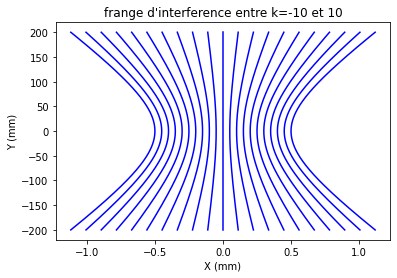

In [9]:
Y = np.linspace(-200, 200, 1000)

for k in range(-10, 11):
    X = point_vect(k, Y, 1, 100, 5e-4)
    plt.plot(X, Y, "b")

plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("frange d'interference entre k=-10 et 10")
plt.show()       

3) On doit donc ecrire une nouvelle fonction retournant l'intensité pour un point de la figure pour source etendu, qui doit utilisé une fonction calculant la nouvelle difference de marche.

In [10]:
def difference_marche_source_etendu(r, phi, x, y, d, D, s):
    diff1 = difference_marche(x, y, d, D) # difference de marche aprés le trous
    
    x2, y2 = r*np.cos(phi), r*np.sin(phi)
    diff2 = difference_marche(x2, y2, d, s) # difference de marche aprés le trous
    
    return diff1 + diff2

def intensite_source_etendu(x, y, d, D, s, R, Lambda):
    def func(phi, r):
        return 1 - np.cos(2*np.pi*difference_marche_source_etendu(r, phi, x, y, d, D, s)/Lambda)
    
    val, _ = integrate.dblquad(func,
                               0, np.pi,
                               0, R)
    
    return val / s**2

intensite_source_etendu_vect = np.vectorize(intensite_source_etendu)

On trace maintenant l'intensité en fonction des données du probleme:

/home/joseph/.local/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


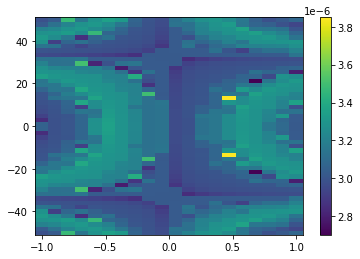

In [11]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-50, 50, 50)

X, Y = np.meshgrid(x, y)

V = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        V[i, j] = intensite_source_etendu_vect(X[i, j], Y[i, j], 1, 100, 10, 1e-4, 5e-4)

plt.pcolor(x, y, V, shading='auto')
plt.colorbar()
plt.show()

## C - Domaine de cohérence et contraste d’interférence

In [12]:
Rmax = 5e-4 * 10 / (2 * 100)

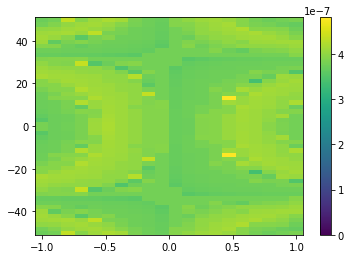

In [13]:
V = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        V[i, j] = intensite_source_etendu_vect(X[i, j], Y[i, j], 1, 100, 10, 0.5*Rmax, 5e-4)

plt.pcolor(x, y, V, shading='auto', vmin=0)
plt.colorbar()
plt.show()

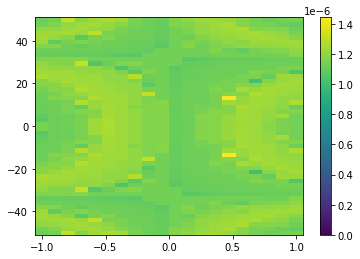

In [14]:
V = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        V[i, j] = intensite_source_etendu_vect(X[i, j], Y[i, j], 1, 100, 10, 1.5*Rmax, 5e-4)

plt.pcolor(x, y, V, shading='auto', vmin=0)
plt.colorbar()
plt.show()

In [15]:
def contraste(List):
    Max = np.argmax(List)
    Min = np.argmax(List)
    
    return (Max - Min)/(Max + Min)

def contraste_source_etendu(d, D, s, R, Lambda):
    x = np.linspace(-1, 1, 10)
    y = np.linspace(-3, 3, 10)

    X, Y = np.meshgrid(x, y)

    V = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            V[i, j] = intensite_source_etendu_vect(X[i, j], Y[i, j], 1, 100, 10, 1.5*Rmax, 5e-4)
    
    return contraste(V)
    

In [ ]:
d = np.linspace(0, 0.2, 10)
R = np.linspace(0, 0.01, 10)

d_List, R = np.meshgrid(d, R)

C = np.zeros(R.shape)
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        C[i, j] = contraste_source_etendu(d_List[i, j], 100, 10, R[i, j], 5e-4)

plt.contour(R, d_list, C)
plt.show()